In [5]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [13]:
import plot_is

In [14]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


# $\rho_c/\rho_0$ = 5 (This is really low!!)

In [8]:
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
rho_c = 0.02806
scale_d = 3.92e-18

In [9]:
xi_max=7
rho_rat  = 5
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
idx = np.where(rho_c/rho>rho_rat)[0][0]
print "density contrast of ",rho_rat ,"happens at xi = ",xi[idx]

density contrast of  5 happens at xi =  4.080001


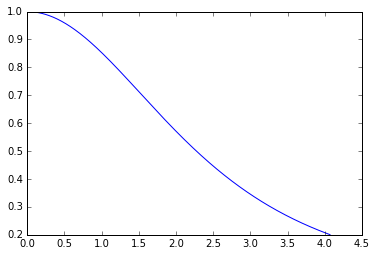

In [10]:
xi_max = xi[idx]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(xi,rho/rho_c)

In [11]:
print "Actual Density contrast of ", (rho_c/rho)[-1]

Actual Density contrast of  4.98643850758


In [12]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho/rho_c)

# Pressure setup 

In [28]:
dens_arr = np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")
rho_c = 0.02806
scale_d = 3.92e-18
rho_min = min(dens_arr)*rho_c*scale_d
print rho_min

2.20588702403e-20


In [29]:
T_in = 10#K
k = 1.38e-16 #cgs
mp = 1.6726219e-24 #grams
scale_p =  2.51e-9 
P_out = (rho_min*k*T_in/mp)/scale_p 
print "Pressure at edge of cloud : ",P_out*scale_p , "cgs"
print "Pressure at edge of cloud: ", P_out , "code units"

Pressure at edge of cloud :  1.81997144313e-11 cgs
Pressure at edge of cloud:  0.00725088224357 code units


In [30]:
T_out = 1e7#K
rho_out = ((P_out*scale_p)*mp/k/T_out)/scale_d
print "Denisty outside the cloud: " , rho_out*scale_d,"cgs"
print "Denisty outside the cloud: ", rho_out , "code units"

Denisty outside the cloud:  2.20588702403e-26 cgs
Denisty outside the cloud:  5.6272628164e-09 code units


In [31]:
print "Change the dens_arr length in condinit.f90 to: ",len(dens_arr)
print "Change the xi_max in condinit.f90 to : ",xi_max

Change the dens_arr length in condinit.f90 to:  408
Change the xi_max in condinit.f90 to :  4.080001



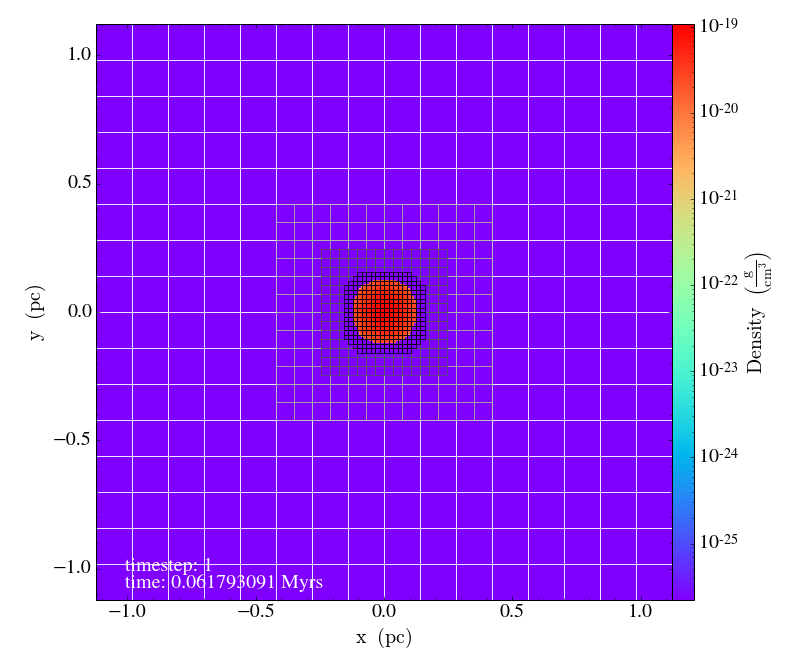


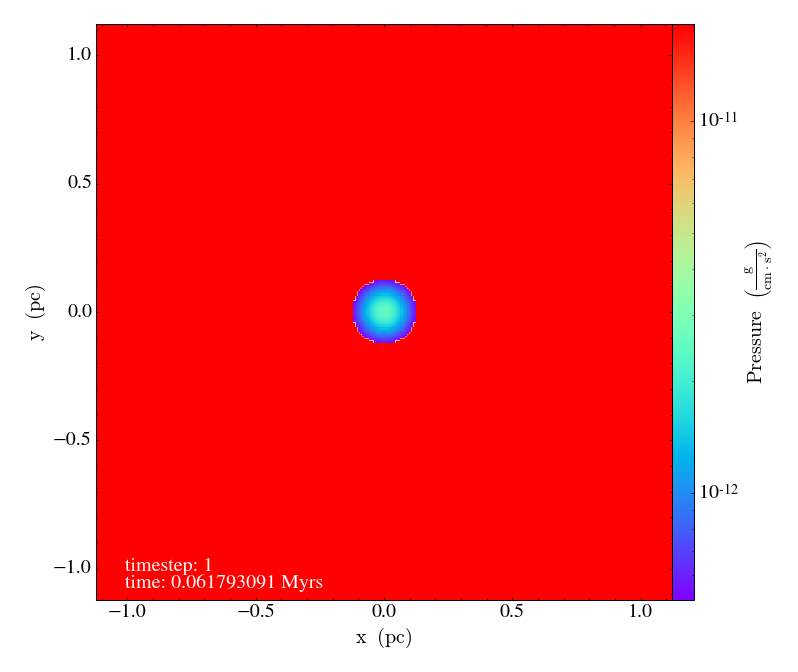


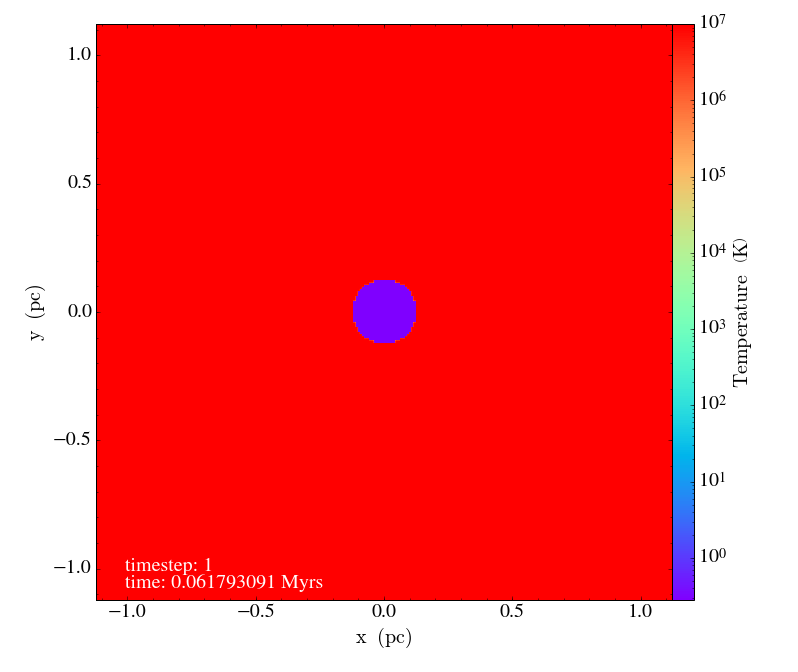

In [38]:
plot_is.plot_time_slice("density",1,grid=True)#,1,zmin=1e-26,zmax=1e-19)
plot_is.plot_time_slice("pressure",1)
plot_is.plot_time_slice("temperature",1)


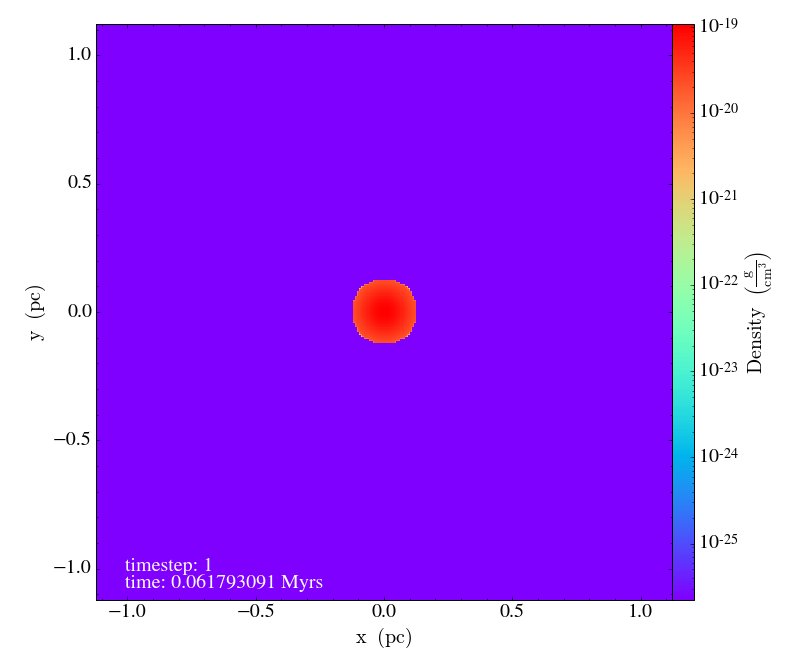

In [37]:
plot_is.plot_time_slice("density",1)


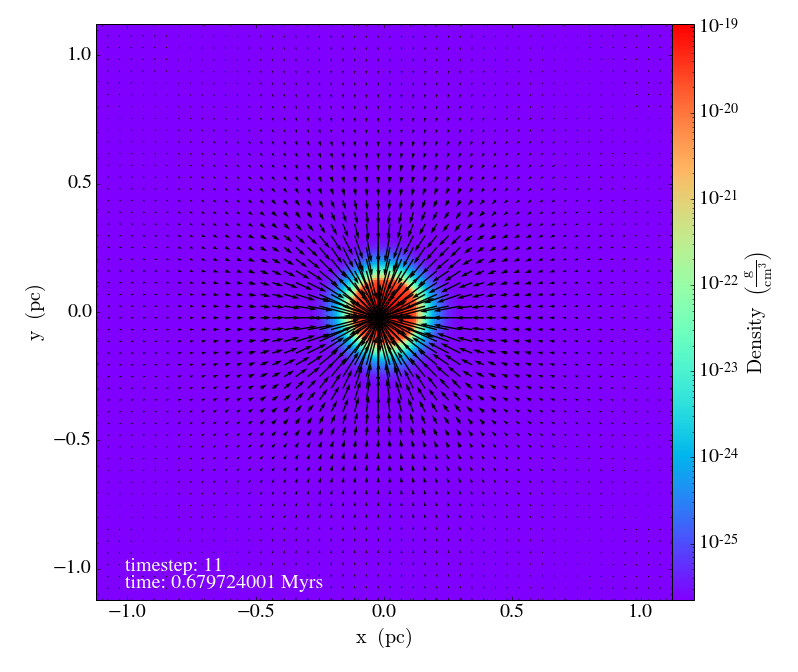

In [36]:
plot_is.plot_time_slice("density",11)

I verified that self gravity is actually turned off by looking into the output files and searched for "poisson" and saw that it didn't show up 

Whereas if you go into vim /project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin/509008.out, you see that the backup_poisson and things like that get called 

I suspect that the pressure inward is due to the very hot temperature on the outside and the low temperature of the dense core (so naturally the sphere would want to expand )